In [151]:
import numpy as np


In [152]:
train_data=np.load("S:/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz")
X_train=train_data["arr_0"]

In [153]:
train_label = np.load("S:/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz")
y_train = train_label["arr_0"]

In [154]:
test_data=np.load("S:/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz")
X_test=test_data["arr_0"]

In [155]:
test_label=np.load("S:/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz")
y_test=test_label["arr_0"]

In [156]:
#print the shape of loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [157]:
dataset=np.load("S:/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz")
x_train=dataset["arr_0"]
print("Training data shape is",x_train.shape)

Training data shape is (60000, 28, 28)


In [158]:
import matplotlib.pyplot as plt
import matplotlib

In [159]:
some_digit=X_train[80]

In [160]:
some_digit_img=some_digit.reshape(28,28)

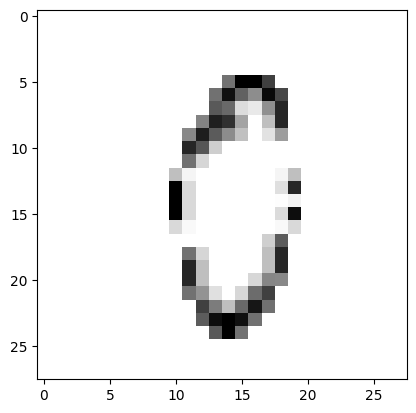

In [161]:
plt.imshow(some_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")

In [162]:
y_train[80]

0

In [163]:
from sklearn.decomposition import PCA

In [164]:
#The reshaping operation converts each 28x28 image into a single vector of length 784 (since 28 * 28 = 784). This is done because PCA requires a 2D array where rows represent samples and columns represent features.
# This results in x_train_2d having the shape (60000, 784)
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [165]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    ## Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)

    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [167]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.7997
Decision Tree F1-score: 0.798995919559188
Decision Tree Recall: 0.7997
Decision Tree ROC-AUC: 0.8887222222222222
Decision Tree Confusion Matrix:
[[727 146  15  39   3   3   3  13  32  19]
 [ 83 807   9  33   5  16   2   8  22  15]
 [  4   3 923   8   2  21  20   7   5   7]
 [ 13  16   4 774  32  34  30  59  17  21]
 [  3   1   3  39 845  52   5   8  19  25]
 [  7  12   9  10 105 794  18   7  18  20]
 [  5   6   5  42  17  24 769 100   8  24]
 [ 12  11   6  65  26   7 146 669  22  36]
 [ 48  28  16   3   5  10   4   5 862  19]
 [ 16  33   2   6  27   8  11  13  57 827]]


In [168]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8751
Random Forest F1-score: 0.8745354044621747
Random Forest Recall: 0.8751000000000001
Random Forest ROC-AUC: 0.9891791166666668
Random Forest Confusion Matrix [[781 154   3  31   5   0   1   2  16   7]
 [ 32 906   0  20   5   3   0   4  18  12]
 [  4   1 979   2   0   8   0   4   1   1]
 [ 10  12   1 886  19  18  10  27  15   2]
 [  0   1   0  26 920  32   2   2  10   7]
 [  0   4   1  10 115 849   5   4   8   4]
 [  3   8   2  48  15  24 834  50   2  14]
 [  4  12   2  38  22   1 130 748  10  33]
 [ 16  16   1   4   4   5   1   0 950   3]
 [  6  12   0   4  18   0   5   5  52 898]]


In [169]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7724
Naive Bayes F1-score: 0.771013365459781
Naive Bayes Recall: 0.7724
Naive Bayes ROC-AUC: 0.9722809666666666
Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 25 749   9 121   8   2   0   0  66  20]
 [  9   1 966   3   0  16   1   3   1   0]
 [ 13   7   2 844  32  16  21  64   0   1]
 [  1   1   1  39 872  43   1   7  28   7]
 [  0   2  15  47 165 731   6  16  12   6]
 [  5   9  51  30  25  44 729  94   3  10]
 [  9  17   4  80  50   1 177 650   2  10]
 [ 89  35  26   6   4   3   2   4 823   8]
 [ 19  28   1   8  62   0   3  21 106 752]]


In [170]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.8817
K-NN F1-score: 0.8806076311350569
K-NN Recall: 0.8817
K-NN ROC-AUC: 0.9736645166666665
K-NN Confusion Matrix
[[776 169   1  27   2   0   2   3  14   6]
 [ 18 943   0  16   4   1   0   2  11   5]
 [  6   1 979   3   0   7   1   2   1   0]
 [ 10  12   0 888  20  22   4  15  25   4]
 [  0   1   0  14 952  22   1   2   4   4]
 [  0   3   0   8 116 858   3   3   4   5]
 [  0   6   0  42  21  10 842  65   0  14]
 [  7   8   0  52  34   3 166 699   6  25]
 [ 15   9   2   1   3   6   3   0 958   3]
 [  5   8   0   0  25   0   7   4  29 922]]


In [171]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.8869
SVM F1-score: 0.8863641931735421
SVM Recall: 0.8869
SVM ROC-AUC: 0.9924983999999999
SVM confusion Matrix
[[810 140   1  22   6   0   1   2  15   3]
 [ 19 924   0  28   3   3   0   4  11   8]
 [  3   2 984   1   0   5   0   3   1   1]
 [  8  11   0 887  20  22   8  26  18   0]
 [  0   1   0  14 948  22   0   0   5  10]
 [  0   4   1   4 124 854   3   3   4   3]
 [  0  10   1  50  20  21 845  40   0  13]
 [  5  13   0  33  17   4 136 746   7  39]
 [  8  14   4   0   4   4   3   0 959   4]
 [  2  13   0   0  23   0   6   3  41 912]]


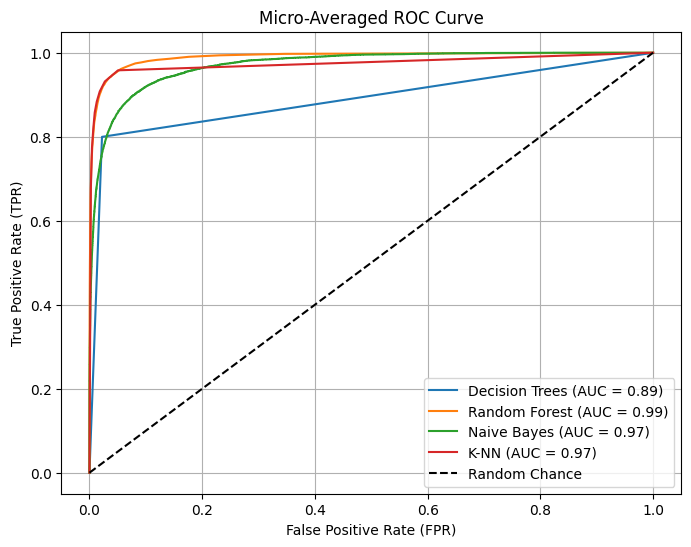

In [172]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

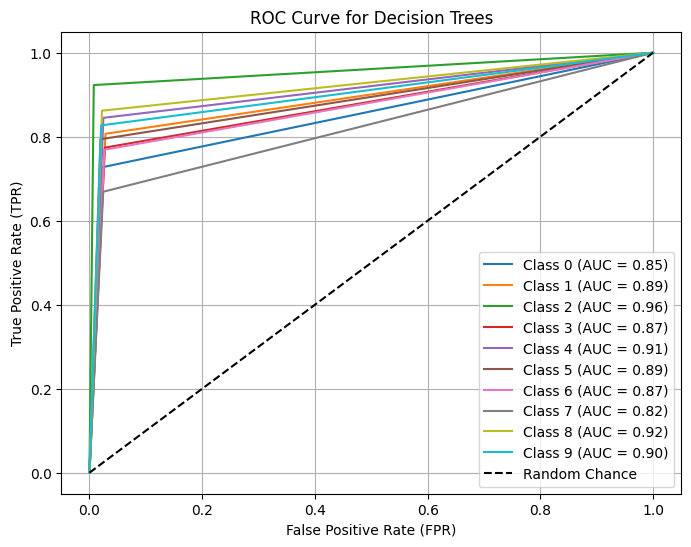

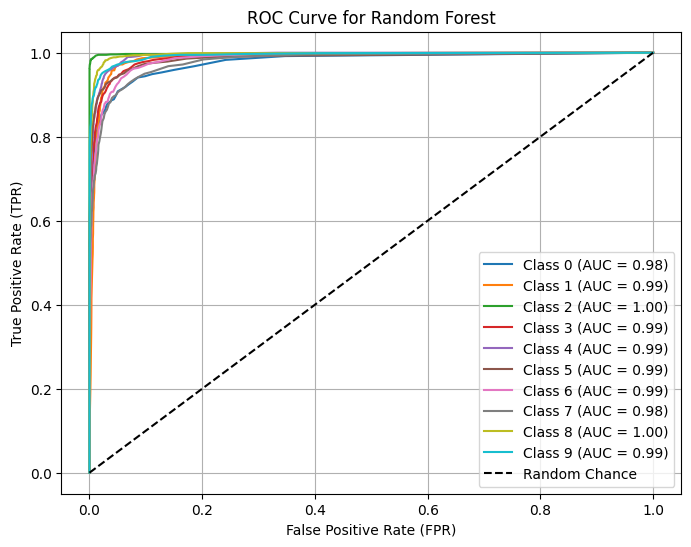

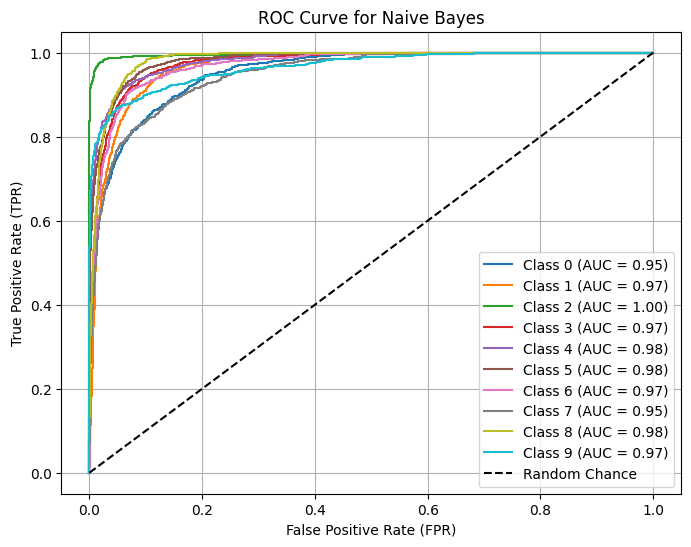

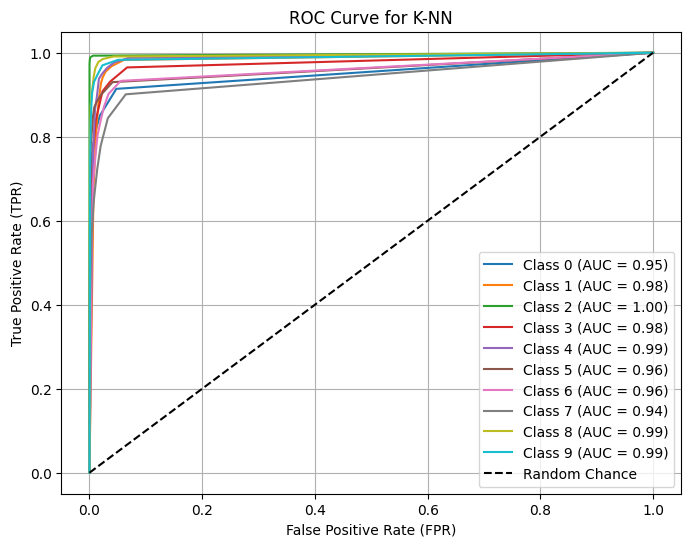

In [173]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])

# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])

# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [174]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [175]:
dt_classifier = DecisionTreeClassifier()
evaluation_results = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", evaluation_results[0])
print("Decision Tree F1-score:", evaluation_results[1])
print("Decision Tree Recall:", evaluation_results[2])
print("Decision Tree ROC-AUC:", evaluation_results[3])

Decision Tree Accuracy: 0.8087
Decision Tree F1-score: 0.8077545556476007
Decision Tree Recall: 0.8087
Decision Tree ROC-AUC: 0.8937222222222223


In [176]:
rf_classifier = RandomForestClassifier()
evaluation_results = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:",evaluation_results[0] )
print("Random Forest F1-score:", evaluation_results[1])
print("Random Forest Recall:", evaluation_results[2])
print("Random Forest ROC-AUC:", evaluation_results[3])

Random Forest Accuracy: 0.8947
Random Forest F1-score: 0.8941732799415639
Random Forest Recall: 0.8946999999999999
Random Forest ROC-AUC: 0.9918984722222222


In [178]:
nb_classifier = GaussianNB()
evaluation_results = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", evaluation_results[0])
print("Naive Bayes F1-score:", evaluation_results[1])
print("Naive Bayes Recall:", evaluation_results[2])
print("Naive Bayes ROC-AUC:", evaluation_results[3])

Naive Bayes Accuracy: 0.7848
Naive Bayes F1-score: 0.7832564197373008
Naive Bayes Recall: 0.7847999999999999
Naive Bayes ROC-AUC: 0.9747959111111111


In [179]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
evaluation_results = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", evaluation_results[0])
print("K-NN F1-score:", evaluation_results[1])
print("K-NN Recall:", evaluation_results[2])
print("K-NN ROC-AUC:", evaluation_results[3])

K-NN Accuracy: 0.9074
K-NN F1-score: 0.9068803915420188
K-NN Recall: 0.9074
K-NN ROC-AUC: 0.9821775722222222


In [180]:
svm_classifier = SVC(probability=True)
evaluation_results = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", evaluation_results[0])
print("SVM F1-score:", evaluation_results[1])
print("SVM Recall:", evaluation_results[2])
print("SVM ROC-AUC:", evaluation_results[3])

SVM Accuracy: 0.9135
SVM F1-score: 0.9129951295508374
SVM Recall: 0.9135
SVM ROC-AUC: 0.9953387222222222


In [ ]:
## performing incremental PCA and reducing the size to 15 components

In [181]:
from sklearn.decomposition import IncrementalPCA

# Reshape the training and test data to 2D
x_train_2d = X_train.reshape(x_train.shape[0], -1)
x_test_2d = X_test.reshape(x_test.shape[0], -1)

# Create and fit Incremental PCA
ipca = IncrementalPCA(n_components=10, batch_size=1000)
for batch in np.array_split(x_train_2d, len(x_train_2d) // 1000):
    ipca.partial_fit(batch)

# Transform the data using IPCA
x_train_ipca = ipca.transform(x_train_2d)
x_test_ipca = ipca.transform(x_test_2d)

# Print the shape of the transformed data
print("Training data shape after IPCA:", x_train_ipca.shape)
print("Test data shape after IPCA:", x_test_ipca.shape)

Training data shape after IPCA: (60000, 10)
Test data shape after IPCA: (10000, 10)


In [183]:
dt_classifier = DecisionTreeClassifier()
evaluation_results = evaluate_model(dt_classifier,x_train_ipca, y_train, x_test_ipca, y_test)
print("Decision Tree Accuracy:", evaluation_results[0])
print("Decision Tree F1-score:", evaluation_results[1])
print("Decision Tree Recall:", evaluation_results[2])
print("Decision Tree ROC-AUC:", evaluation_results[3])

Decision Tree Accuracy: 0.8048
Decision Tree F1-score: 0.8039663572460803
Decision Tree Recall: 0.8048
Decision Tree ROC-AUC: 0.8915555555555554


In [184]:
rf_classifier = RandomForestClassifier()
evaluation_results = evaluate_model(rf_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("Random Forest Accuracy:", evaluation_results[0])
print("Random Forest F1-score:", evaluation_results[1])
print("Random Forest Recall:", evaluation_results[2])
print("Random Forest ROC-AUC:", evaluation_results[3])

Random Forest Accuracy: 0.874
Random Forest F1-score: 0.8735631199600462
Random Forest Recall: 0.874
Random Forest ROC-AUC: 0.98988315


In [185]:
nb_classifier = GaussianNB()
evaluation_results = evaluate_model(nb_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("Naive Bayes Accuracy:", evaluation_results[0])
print("Naive Bayes F1-score:", evaluation_results[1])
print("Naive Bayes Recall:", evaluation_results[2])
print("Naive Bayes ROC-AUC:", evaluation_results[3])

Naive Bayes Accuracy: 0.7627
Naive Bayes F1-score: 0.7614761019280496
Naive Bayes Recall: 0.7626999999999999
Naive Bayes ROC-AUC: 0.9714617333333333


In [186]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
evaluation_results = evaluate_model(knn_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("K-NN Accuracy:", evaluation_results[0])
print("K-NN F1-score:", evaluation_results[1])
print("K-NN Recall:", evaluation_results[2])
print("K-NN ROC-AUC:", evaluation_results[3])

K-NN Accuracy: 0.8835
K-NN F1-score: 0.8826611711889891
K-NN Recall: 0.8835000000000001
K-NN ROC-AUC: 0.9738341444444444


In [187]:
svm_classifier = SVC(probability=True)
evaluation_results = evaluate_model(svm_classifier, x_train_ipca, y_train, x_test_ipca, y_test)
print("SVM Accuracy:", evaluation_results[0])
print("SVM F1-score:", evaluation_results[1])
print("SVM Recall:", evaluation_results[2])
print("SVM ROC-AUC:", evaluation_results[3])

SVM Accuracy: 0.8933
SVM F1-score: 0.8926762445795117
SVM Recall: 0.8933
SVM ROC-AUC: 0.9930335555555556
